In [1]:
from src.feature_selection import *
import pandas as pd

In [2]:
data = pd.read_csv('../data/preprocessed_heart_disease_data.csv')

In [3]:
features = [col for col in data.columns if col != 'target']
target = 'target'

In [4]:
# Check the data structure
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   trestbps     303 non-null    float64
 2   thalach      303 non-null    float64
 3   ca           303 non-null    float64
 4   chol         303 non-null    float64
 5   oldpeak      303 non-null    float64
 6   sex_1.0      303 non-null    float64
 7   cp_2.0       303 non-null    float64
 8   cp_3.0       303 non-null    float64
 9   cp_4.0       303 non-null    float64
 10  fbs_1.0      303 non-null    float64
 11  restecg_1.0  303 non-null    float64
 12  restecg_2.0  303 non-null    float64
 13  exang_1.0    303 non-null    float64
 14  slope_2.0    303 non-null    float64
 15  slope_3.0    303 non-null    float64
 16  thal_6.0     303 non-null    float64
 17  thal_7.0     303 non-null    float64
 18  target       303 non-null    int64  
dtypes: float

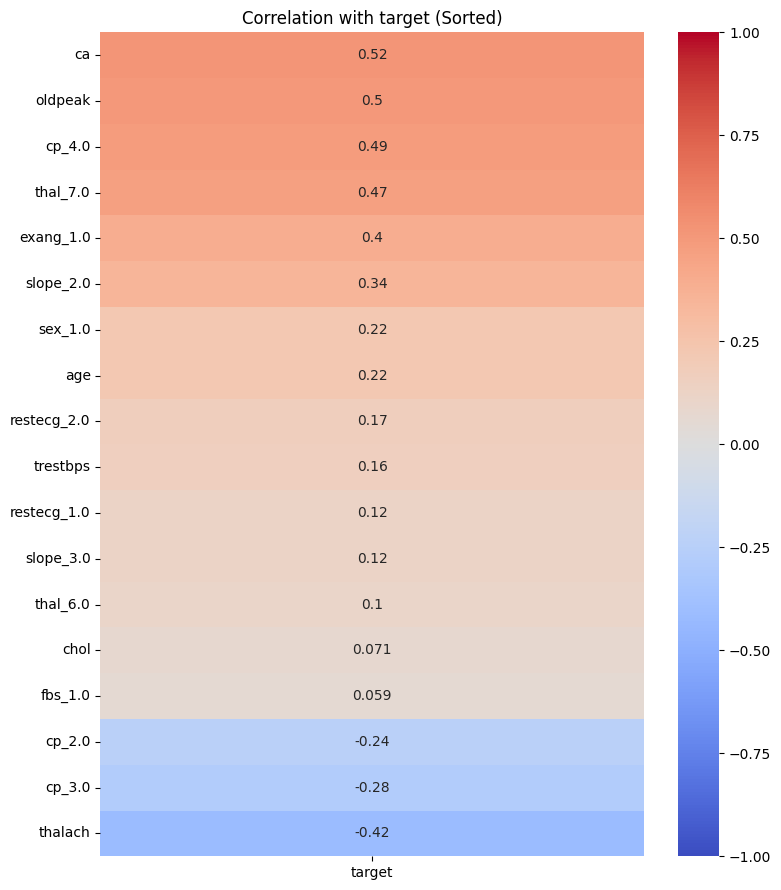


Correlations with target variable 'target' (sorted):
               target
ca           0.517390
oldpeak      0.504092
cp_4.0       0.490494
thal_7.0     0.466119
exang_1.0    0.397057
slope_2.0    0.344230
sex_1.0      0.224469
age          0.222853
restecg_2.0  0.168387
trestbps     0.157754
restecg_1.0  0.123792
slope_3.0    0.119900
thal_6.0     0.103916
chol         0.070909
fbs_1.0      0.059186
cp_2.0      -0.238240
cp_3.0      -0.284135
thalach     -0.415040


In [5]:
# Correlation Analysis
correlation_analysis(data, 'target')

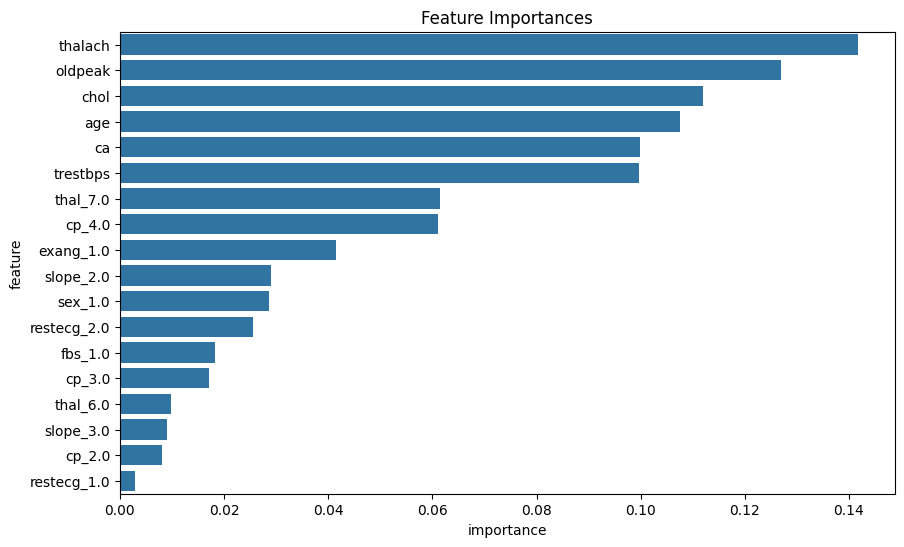

        feature  importance
0       thalach    0.141736
1       oldpeak    0.126955
2          chol    0.111960
3           age    0.107628
4            ca    0.099798
5      trestbps    0.099666
6      thal_7.0    0.061419
7        cp_4.0    0.061064
8     exang_1.0    0.041481
9     slope_2.0    0.028941
10      sex_1.0    0.028635
11  restecg_2.0    0.025582
12      fbs_1.0    0.018353
13       cp_3.0    0.017063
14     thal_6.0    0.009760
15    slope_3.0    0.008950
16       cp_2.0    0.008159
17  restecg_1.0    0.002852


In [6]:
# Feature Importance using Random Forest
importance_df = feature_importance(data[features], data[target])
print(importance_df)

In [7]:
# Recursive Feature Elimination (RFE)
selected_features = recursive_feature_elimination(data[features], data[target], n_features_to_select=10)

Selected features using RFE: ['age', 'trestbps', 'thalach', 'ca', 'chol', 'oldpeak', 'cp_4.0', 'exang_1.0', 'slope_2.0', 'thal_7.0']


In [8]:
# Address class imbalance using SMOTE
x_resampled, y_resampled = address_class_imbalance(data[features], data[target])

Class distribution before SMOTE:
target
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: proportion, dtype: float64

Class distribution after SMOTE:
target
0    0.2
2    0.2
1    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64


In [9]:
# Variance Inflation Factor (VIF)
vif_data = calculate_vif(data[features])
print(vif_data)

        feature       VIF
0           age  1.495164
1      trestbps  1.216051
2       thalach  1.673684
3            ca  1.326635
4          chol  5.923504
5       oldpeak  3.286492
6       sex_1.0  3.476208
7        cp_2.0  2.009046
8        cp_3.0  2.625176
9        cp_4.0  4.711999
10      fbs_1.0  1.292470
11  restecg_1.0  1.101873
12  restecg_2.0  2.147528
13    exang_1.0  2.152676
14    slope_2.0  2.917980
15    slope_3.0  1.666095
16     thal_6.0  1.335008
17     thal_7.0  2.552142
        feature       VIF
0           age  1.495164
1      trestbps  1.216051
2       thalach  1.673684
3            ca  1.326635
4          chol  5.923504
5       oldpeak  3.286492
6       sex_1.0  3.476208
7        cp_2.0  2.009046
8        cp_3.0  2.625176
9        cp_4.0  4.711999
10      fbs_1.0  1.292470
11  restecg_1.0  1.101873
12  restecg_2.0  2.147528
13    exang_1.0  2.152676
14    slope_2.0  2.917980
15    slope_3.0  1.666095
16     thal_6.0  1.335008
17     thal_7.0  2.552142


In [10]:
# Cross-Validation Evaluation
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores = evaluate_model_with_cv(data[features], data[target], rf_model)
print("Cross-validation Scores:", cv_scores)

Cross-validation accuracy: 0.56 ± 0.04
Cross-validation Scores: [0.60655738 0.62295082 0.52459016 0.53333333 0.51666667]


Mutual Information Scores:
        Feature  Mutual Information Score
3            ca                  0.181786
17     thal_7.0                  0.163023
9        cp_4.0                  0.137436
5       oldpeak                  0.123143
13    exang_1.0                  0.103281
10      fbs_1.0                  0.072330
14    slope_2.0                  0.066333
2       thalach                  0.065653
6       sex_1.0                  0.030956
4          chol                  0.030417
12  restecg_2.0                  0.029610
16     thal_6.0                  0.023998
8        cp_3.0                  0.021064
7        cp_2.0                  0.000000
1      trestbps                  0.000000
11  restecg_1.0                  0.000000
15    slope_3.0                  0.000000
0           age                  0.000000
        Feature  Mutual Information Score
3            ca                  0.181786
17     thal_7.0                  0.163023
9        cp_4.0                  0.137436
5      

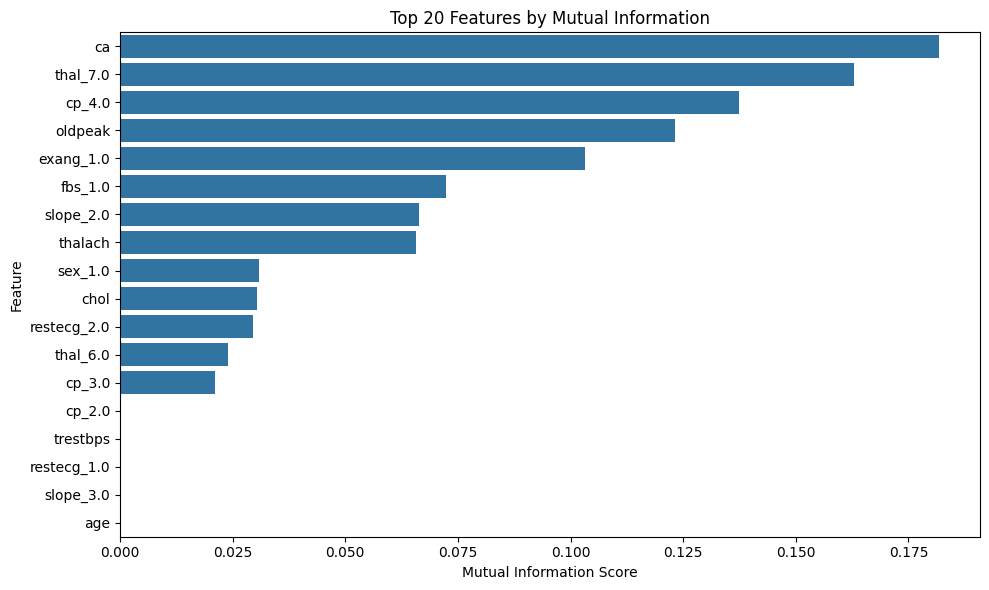

In [11]:
# Mutual Information Analysis
mi_df = mutual_information_test(data[features], data[target])
print(mi_df)

# Plot Mutual Information
plot_mutual_information(mi_df)

In [12]:
# PCA Analysis
x_pca, explained_variance = pca_analysis(data[features], n_components=5)
print("Explained Variance from PCA:", explained_variance)

Explained variance by 5 components: [0.31390674 0.16819977 0.12486358 0.09980334 0.05474248]
Explained Variance from PCA: [0.31390674 0.16819977 0.12486358 0.09980334 0.05474248]


In [13]:
# ANOVA F-Test
anova_df = anova_test(data[features], data[target])
print(anova_df)

ANOVA F-Test Results:
        Feature    F-Value       p-Value
9        cp_4.0  29.526169  1.080032e-20
3            ca  27.916982  1.059514e-19
5       oldpeak  26.237399  1.190779e-18
17     thal_7.0  24.991575  7.341250e-18
2       thalach  19.118957  5.192882e-14
13    exang_1.0  19.046004  5.815321e-14
14    slope_2.0  11.874312  5.782154e-09
8        cp_3.0   8.394486  1.983754e-06
6       sex_1.0   6.242316  7.776607e-05
7        cp_2.0   5.347054  3.591125e-04
0           age   4.891340  7.813300e-04
12  restecg_2.0   3.239451  1.269334e-02
16     thal_6.0   2.974883  1.966798e-02
1      trestbps   2.033103  8.975503e-02
10      fbs_1.0   1.973558  9.849580e-02
11  restecg_1.0   1.670468  1.567718e-01
15    slope_3.0   1.489745  2.052094e-01
4          chol   0.865753  4.848198e-01
        Feature    F-Value       p-Value
9        cp_4.0  29.526169  1.080032e-20
3            ca  27.916982  1.059514e-19
5       oldpeak  26.237399  1.190779e-18
17     thal_7.0  24.991575  7.34125